Importanto bibliotecas necessárias

In [27]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Introdução


**Contextualização**

O objetivo do presente projeto de Ciência de Dados é explorar e analisar indicadores de fluxo da Educação Superior a partir de uma base de dados governamentais. O projeto tem a finalidade de prever o comportamento de uma variável principal em relação a diversas outras variáveis que podem influenciar seu desempenho. Na linguagem da estatística e da Ciência de Dados, a variável principal é comumente chamada de "Target", enquanto as demais variáveis que a influenciam são conhecidas como "Features".

**Tema e Objetivo**

O tema central deste projeto gira em torno da Educação Superior, sendo o objetivo principal responder a seguinte pergunta:

    É possível prever o número de desistências em cursos de graduação com base em indicadores específicos?

Para atingir esse objetivo, foi escolhida uma base de dados do governo nacional que contém informações abrangentes sobre instituições de ensino, cursos de graduação e seus respectivos indicadores. Utilizaremos esses dados para construir um modelo preditivo que permita prever a quantidade de desistências em cursos de graduação. A variável principal (ou "Target") é a "Quantidade de Desistência no Curso no ano de referência".

**Base de Dados**

A fonte de dados é uma base governamental, composta por microdados, que fornece informações detalhadas sobre instituições de ensino, cursos de graduação e outros dados acadêmicos. Essa base contém colunas que descrevem a instituição, o curso, a região geográfica, a unidade federativa, o grau acadêmico, bem como diversas métricas educacionais, como a quantidade de ingressantes, a quantidade de concluintes, a taxa de permanência e a taxa de conclusão, entre outras.

A base de dados pode ser obtida através do link abaixo, selecionando os anos 2018-2022.
https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/indicadores-educacionais/indicadores-de-fluxo-da-educacao-superior 

Uma amostra dessa base de dados pode ser vista na seção abaixo:

In [28]:
dados_aguafiltrada0 =  pd.read_excel('Água_Filtrada_por_município.xlsx')
dados_popmunicipio0 =  pd.read_excel('População_Residente_por_Múnicipio.xlsx')
dados_pib0 = pd.read_excel('Pib_per_capita_por_municipio.xlsx')
dados_idososcasas0 = pd.read_excel('Porcentagem_de_Idosos_nas_Casas.xlsx')
dados_lixo0 = pd.read_excel('Lixo_Municipio.xlsx')
dados_desemprego0 = pd.read_excel('Taxa_de_desemprego.xlsx')
dados_analfabetismo0 = pd.read_excel('Taxa_de_anafalbetismo.xlsx')
dados_coberturavacinal0 = pd.read_excel('Cobertura_vacinal.xlsx')
dados_cobequipessaudebasica0 = pd.read_excel('Cobertua_equipe_ atenção_básica_por_Município.xlsx')
dados_pessoasbaixarenda0 = pd.read_excel('Porcentagem_de_Pessoas_Baixa_Renda.xlsx')
dados_escolariedade0 = pd.read_excel('Escolariedade.xlsx')

In [29]:
dados_IBGE = pd.read_excel('IDH IBGE.xlsx')
dados_SAUDE = pd.read_excel('IBGE_2010_saude.xlsx')

c:\Users\gabri\anaconda3\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [30]:
dados_popmunicipio.tail(10)

,Município,Trat.Água_Filtrada,CD
0,ALTAFLORESTADOESTE,3573.0,110001
1,ARIQUEMES,5285.0,110002
2,CABIXI,751.0,110003
3,CACOAL,11856.0,110004
4,CEREJEIRAS,1927.0,110005
...,...,...,...
5318,VIANOPOLIS,3195.0,522200
5319,VICENTINOPOLIS,1737.0,522205
5320,VILABOA,840.0,522220
5321,VILAPROPICIO,922.0,522230


In [31]:
dados_aguafiltrada = dados_aguafiltrada.drop(dados_aguafiltrada.index[-2:])
dados_popmunicipio = dados_popmunicipio.drop(dados_popmunicipio.index[-4:])
dados_pib = dados_pib.drop(dados_pib.index[-11:])
dados_idososcasas= dados_idososcasas.drop(dados_idososcasas.index[-4:])
dados_lixo = dados_lixo.drop(dados_lixo.index[-2:])
dados_lixo = dados_lixo.drop(labels=['Outro destino', 'Total'], axis=1)
dados_desemprego = dados_desemprego.drop(dados_desemprego.index[-8:])
dados_analfabetismo = dados_analfabetismo.drop(dados_analfabetismo.index[-4:])
dados_coberturavacinal = dados_coberturavacinal.drop(dados_coberturavacinal.index[-3:])
dados_cobequipessaudebasica = dados_cobequipessaudebasica.drop(dados_cobequipessaudebasica.index[-22:])
dados_pessoasbaixarenda = dados_pessoasbaixarenda.drop(dados_pessoasbaixarenda.index[-10:])
dados_escolariedade = dados_escolariedade.drop(dados_escolariedade.index[-8:])

##### Função de separar:


In [32]:
def separa_cod_municipio(dados):
    # Cria duas novas colunas
    dados['CD'] = ''
    

    for i in range(len(dados)):
        string = dados['Município'][i]
        numeros = ''.join(c for c in string if c.isdigit())
        letras = ''.join(c for c in string if c.isalpha())

        
        dados.at[i, 'CD'] = numeros
        dados.at[i, 'Município'] = letras

    return dados

##### **Limpando dados do IBGE**

In [33]:
dados_IBGE.head(3)

,Código IBGE do Município,Código da Unidade da Federação,Sigla da Unidade da Federação,Nome das Grandes Regiões,Código IBGE da Mesoregião,Nome da Mesoregião,Código IBGE da Microregião,Nome da Microregião,IDHM 1991,IDHM 2000,IDHM 2010
0,110001,11,RO,Norte,1102,Leste Rondoniense,11006,Cacoal,0.329,0.483,0.641
1,110002,11,RO,Norte,1102,Leste Rondoniense,11003,Ariquemes,0.432,0.556,0.702
2,110003,11,RO,Norte,1102,Leste Rondoniense,11008,Colorado do Oeste,0.309,0.488,0.650


In [34]:
dados_IBGE.columns


Index(['Código IBGE do Município', 'Código da Unidade da Federação',
       'Sigla da Unidade da Federação', 'Nome das Grandes Regiões',
       'Código IBGE da Mesoregião', 'Nome da Mesoregião',
       'Código IBGE da Microregião', 'Nome da Microregião', 'IDHM 1991',
       'IDHM 2000', 'IDHM 2010'],
      dtype='object')

In [35]:
del dados_IBGE['Código da Unidade da Federação']
del dados_IBGE['Código IBGE da Mesoregião']
del dados_IBGE['Nome da Mesoregião']
del dados_IBGE['Código IBGE da Microregião']
del dados_IBGE['IDHM 1991']
del dados_IBGE['IDHM 2000']
del dados_IBGE['Nome da Microregião']

In [36]:
result_1 = pd.merge(dados_IBGE, dados_SAUDE, how='outer', on='Código IBGE do Município')
result_1

,Código IBGE do Município,Sigla da Unidade da Federação,Nome das Grandes Regiões,IDHM 2010,Estabelecimentos de Saúde particular,Estabelecimentos de Saúde plano de terceiros,Estabelecimentos de Saúde plano próprio,Estabelecimentos de Saúde privado com fins lucrativos,Estabelecimentos de Saúde privado sem fins lucrativos,Estabelecimentos de Saúde privado SUS,Estabelecimentos de Saúde privado total,Estabelecimentos de Saúde com terceirização privado\nSUS
0,110001,RO,Norte,0.641,4,4,0,4,0,0,4,0
1,110002,RO,Norte,0.702,22,20,0,22,0,4,22,0
2,110003,RO,Norte,0.650,0,0,0,0,1,1,1,0
3,110004,RO,Norte,0.718,21,18,2,20,1,5,21,0
4,110005,RO,Norte,0.692,4,3,0,3,1,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5559,522200,GO,Centro-Oeste,0.712,3,2,0,3,0,2,3,0
5560,522205,GO,Centro-Oeste,0.684,2,2,0,2,0,0,2,0
5561,522220,GO,Centro-Oeste,0.647,0,0,0,0,0,0,0,0
5562,522230,GO,Centro-Oeste,0.634,0,0,0,0,0,0,0,0


##### **Merging das bases de dados**

In [37]:
result_1 = pd.merge(dados_pib, dados_aguafiltrada, how='outer', on='Município')
result_2 = pd.merge(result_1, dados_popmunicipio, how='outer', on='Município')
result_3 = pd.merge(result_2 , dados_idososcasas, how='outer', on='Município')
result_4 = pd.merge(result_3, dados_analfabetismo, how='outer', on='Município')
result_5 = pd.merge(result_4, dados_desemprego, how='outer', on='Município')
result_6 = pd.merge(result_5, dados_lixo, how='outer', on='Município')
result_7 = pd.merge(result_6, dados_coberturavacinal, how='outer', on='Município')
result_8 = pd.merge(result_7, dados_pessoasbaixarenda, how='outer', on='Município')
result_9 = pd.merge(result_8, dados_escolariedade, how='outer', on='Município')
df= result_9

##### **Bases de dados**

In [38]:
df.head(3)

,Município,PIB_per_capita,Trat.Água_Filtrada,CD,População_residente,%idosos_resid_como_out_parente,Taxa_de_analfabetismo,Taxa_de_desemprego_16a_e+,Jogado em terreno baldio ou logradouro,"Jogado em rio, lago ou mar",Coberturas Vacinais,%_população_com_renda_,População_de_15_anos_ou_mais
0,110001 ALTA FLORESTA D'OESTE,10725.97,NaN,NaN,24958.0,8.5,12.0,5.01,220,4,83.802871,48.42,17785.0
1,110002 ARIQUEMES,15070.14,NaN,NaN,92448.0,11.0,7.9,4.64,198,8,75.505515,31.05,64984.0
2,110003 CABIXI,10968.00,NaN,NaN,6459.0,5.3,13.8,2.49,47,-,83.333333,48.17,4682.0


In [39]:
df.tail(3)

,Município,PIB_per_capita,Trat.Água_Filtrada,CD,População_residente,%idosos_resid_como_out_parente,Taxa_de_analfabetismo,Taxa_de_desemprego_16a_e+,Jogado em terreno baldio ou logradouro,"Jogado em rio, lago ou mar",Coberturas Vacinais,%_população_com_renda_,População_de_15_anos_ou_mais
10936,510562 MIRASSOL D\'OESTE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.819319,NaN,NaN
10937,522000 SAO JOAO D\'ALIANCA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.157809,NaN,NaN
10938,522070 SITIO D\'ABADIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.230769,NaN,NaN


In [40]:
df.dtypes

Município                                  object
PIB_per_capita                            float64
Trat.Água_Filtrada                        float64
CD                                         object
População_residente                       float64
%idosos_resid_como_out_parente            float64
Taxa_de_analfabetismo                     float64
Taxa_de_desemprego_16a_e+                 float64
Jogado em terreno baldio ou logradouro     object
Jogado em rio, lago ou mar                 object
Coberturas Vacinais                       float64
%_população_com_renda_                    float64
População_de_15_anos_ou_mais              float64
dtype: object

In [41]:
df2 = df.copy()

<AxesSubplot:>

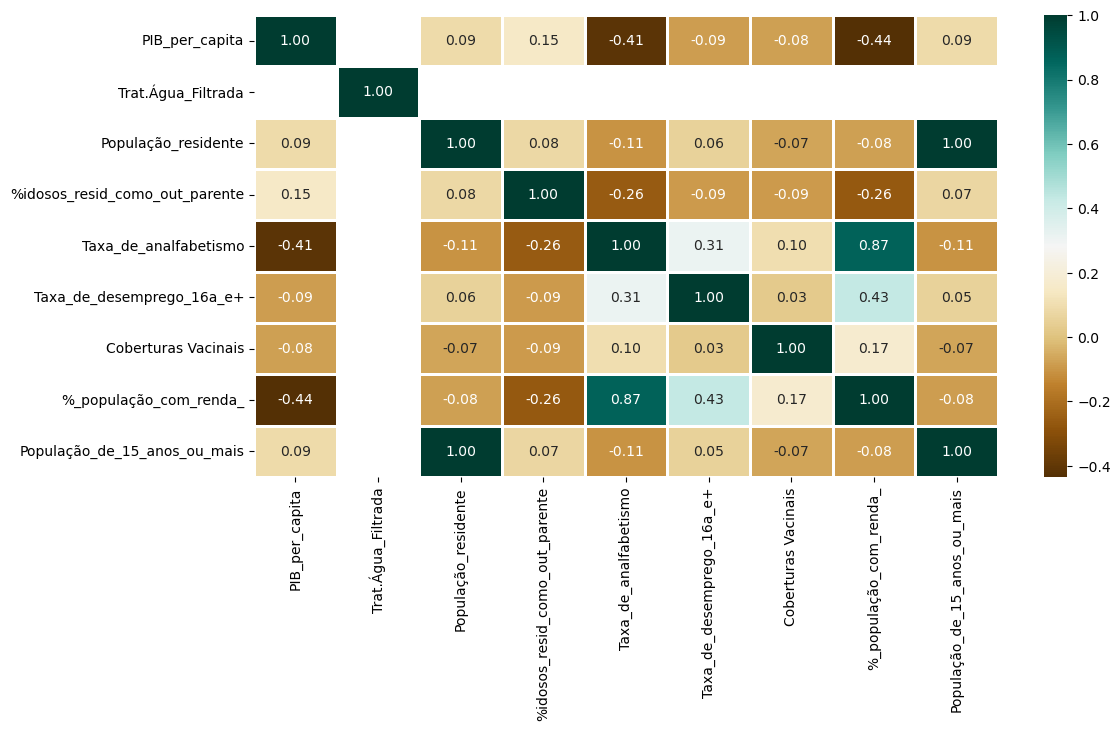

In [42]:
plt.figure(figsize=(12, 6))
sns.heatmap(df2.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

### Dicionário:

- **Jogado em terreno baldio ou logradouro:** Número de moradores por lixo jogado em terreno baldio ou logradouro
- **Jogado em rio, lago ou mar:** Número de moradores por lixo jogado em rio, lago ou mar
- **Cobertura Vacinal** Porcentagem de Vacinas com Cobertura Adequada por município


In [43]:

def separa_cod_municipio(dados):
    # Cria duas novas colunas
    dados['CD'] = ''
    

    for i in range(len(dados)):
        string = dados['Município'][i]
        numeros = ''.join(c for c in string if c.isdigit())
        letras = ''.join(c for c in string if c.isalpha())

        
        dados.at[i, 'CD'] = numeros
        dados.at[i, 'Município'] = letras

    return dados


In [44]:
dataframe = separa_cod_municipio(df2)
dataframe.tail(20)

,Município,PIB_per_capita,Trat.Água_Filtrada,CD,População_residente,%idosos_resid_como_out_parente,Taxa_de_analfabetismo,Taxa_de_desemprego_16a_e+,Jogado em terreno baldio ou logradouro,"Jogado em rio, lago ou mar",Coberturas Vacinais,%_população_com_renda_,População_de_15_anos_ou_mais
10919,GUARANIDOESTE,NaN,NaN,351800,NaN,NaN,NaN,NaN,NaN,NaN,64.774775,NaN,NaN
10920,PALMEIRADOESTE,NaN,NaN,353520,NaN,NaN,NaN,NaN,NaN,NaN,64.613991,NaN,NaN
10921,SANTABARBARADOESTE,NaN,NaN,354580,NaN,NaN,NaN,NaN,NaN,NaN,65.515932,NaN,NaN
10922,SANTACLARADOESTE,NaN,NaN,354610,NaN,NaN,NaN,NaN,NaN,NaN,72.794899,NaN,NaN
10923,SANTARITADOESTE,NaN,NaN,354740,NaN,NaN,NaN,NaN,NaN,NaN,66.604128,NaN,NaN
10924,SAOJOAODOPAUDALHO,NaN,NaN,354930,NaN,NaN,NaN,NaN,NaN,NaN,73.346117,NaN,NaN
10925,DIAMANTEDOESTE,NaN,NaN,410715,NaN,NaN,NaN,NaN,NaN,NaN,68.276348,NaN,NaN
10926,ITAPEJARADOESTE,NaN,NaN,411120,NaN,NaN,NaN,NaN,NaN,NaN,83.951701,NaN,NaN
10927,PEROLADOESTE,NaN,NaN,411900,NaN,NaN,NaN,NaN,NaN,NaN,64.075422,NaN,NaN
10928,RANCHOALEGREDOESTE,NaN,NaN,412135,NaN,NaN,NaN,NaN,NaN,NaN,74.482759,NaN,NaN



**Estrutura do Projeto**

Serão exploradas técnicas de regressão para a previsão da variável quantitativa "Quantidade de Desistência no Curso". A qualidade da comunicação e apresentação dos resultados também será uma prioridade, assegurando que os resultados sejam compreensíveis para um público amplo.

Este projeto tem como objetivo fornecer previsões robustas e ir além de uma simples análise exploratória de dados. Espera-se que a análise e modelos desenvolvidos ajudem a entender e prever as desistências em cursos de graduação, o que pode ter implicações importantes na melhoria da Educação Superior.

### Merge dos Dados

In [45]:
o

NameError: name 'o' is not defined

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(dados.corr(),
			 annot=True, cmap="PiYG_r", linewidths=.5)


ValueError: could not convert string to float: 'Fonte: Censo da Educação Superior/Inep.'

<Figure size 2000x2000 with 0 Axes>

### Data Processing

Categorical variables: 6
Integer variables: 0
Float variables: 25


['Categoria Administrativa', 'Organização Acadêmica', 'Código do Curso de Graduação', 'Código da Região Geográfica do Curso', 'Código da Unidade Federativa do Curso', 'Código do Município do Curso', 'Grau Acadêmico', 'Modalidade de Ensino', 'Código da Grande Área do Curso segundo a classificação CINE BRASIL', 'Ano de Ingresso', 'Ano de Referência', 'Prazo de Integralização em Anos', 'Ano de Integralização do Curso', 'Prazo de Acompanhamento do Curso em anos', 'Ano Máximo de Acompanhamento do Curso', 'Quantidade de Ingressantes no Curso', 'Quantidade de Permanência no Curso no ano de referência', 'Quantidade de Concluintes no Curso no ano de referência', 'Quantidade de Desistência no Curso no ano de referência', 'Quantidade de Falecimentos no Curso no ano de referência', 'Taxa de Permanência - TAP', 'Taxa de Conclusão Acumulada - TCA', 'Taxa de Desistência Acumulada - TDA', 'Taxa de Conclusão Anual - TCAN', 'Taxa de Desistência Anual - TADA']


<AxesSubplot:>

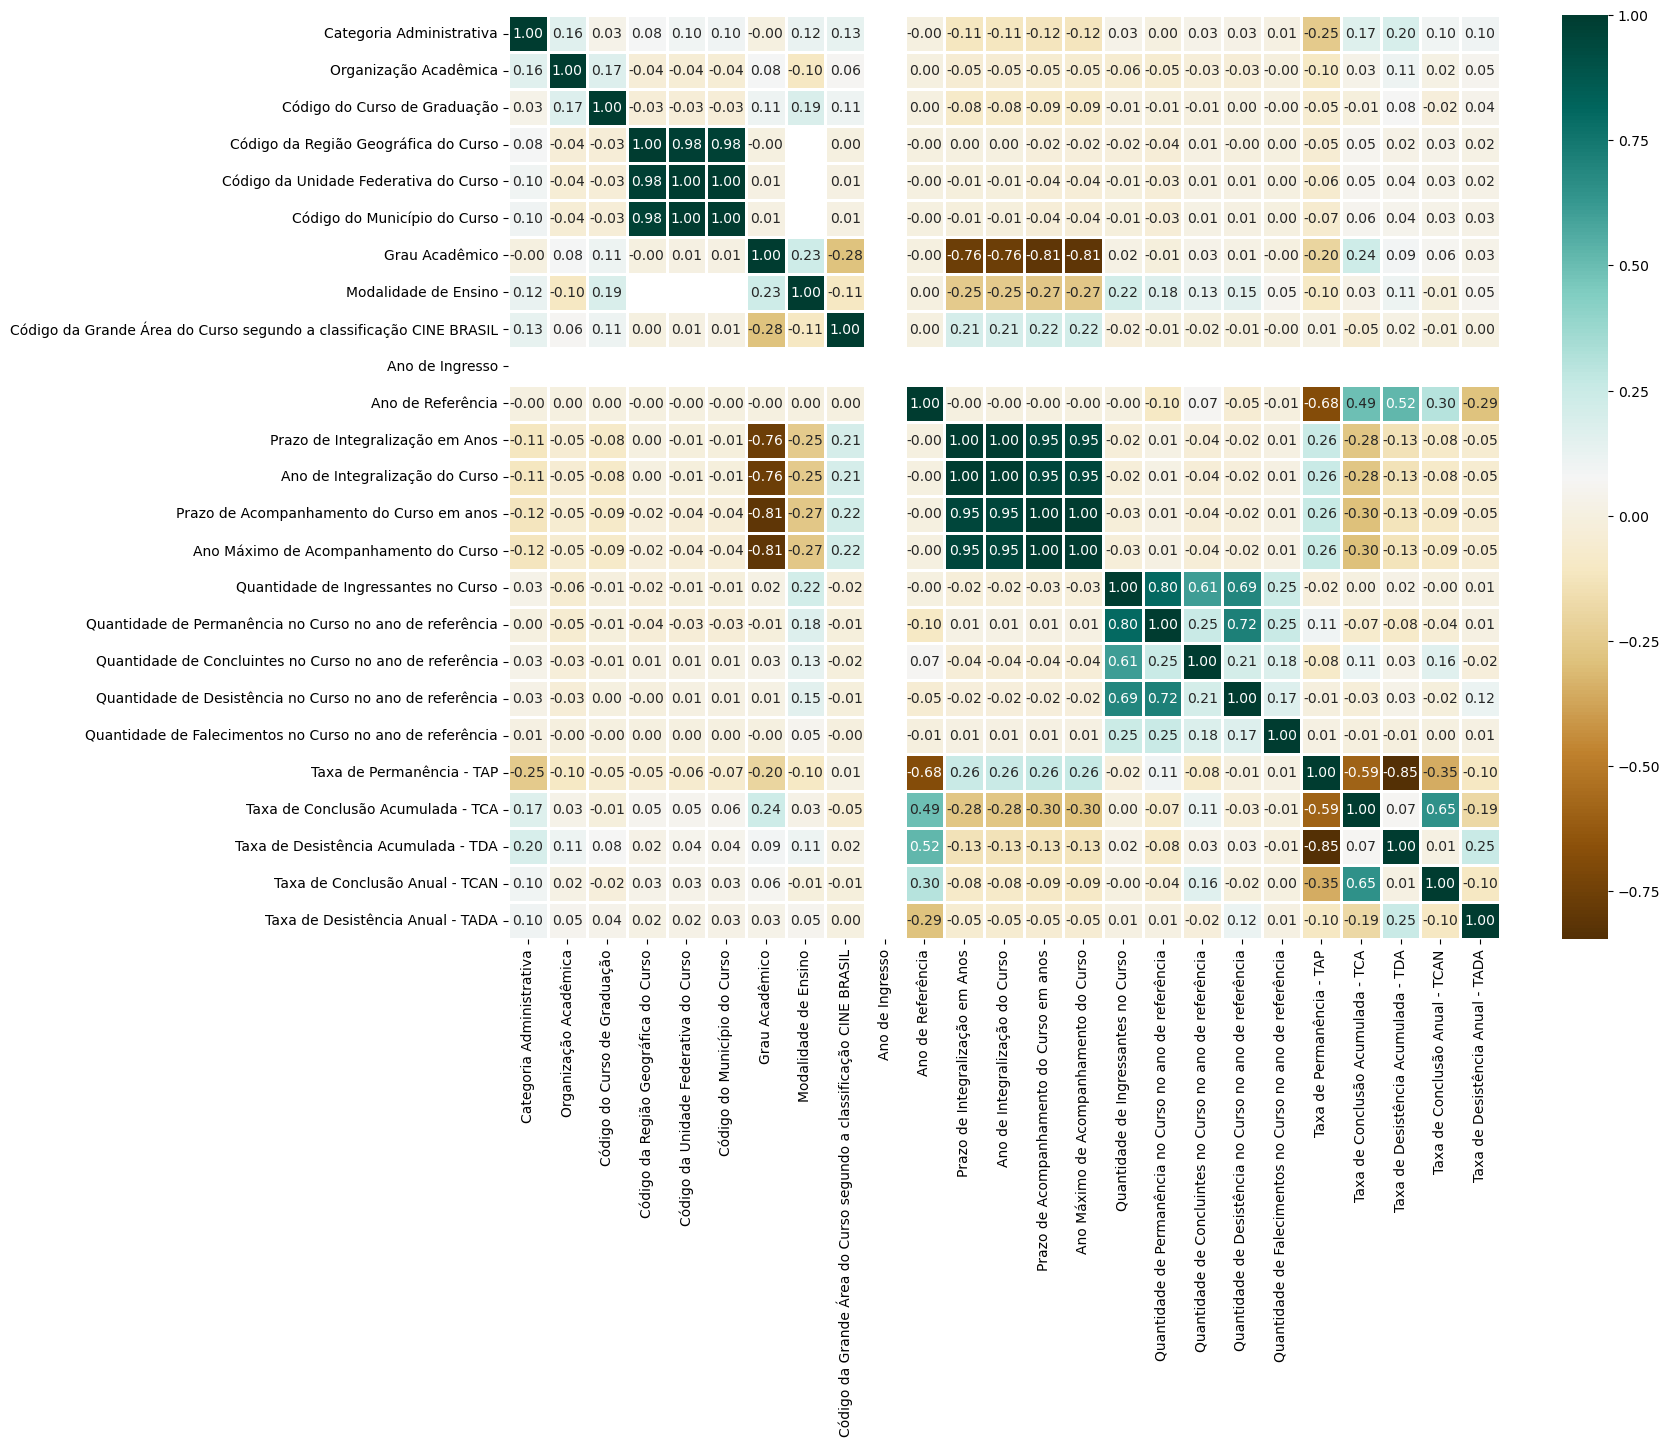

# Minerando Dados e Características do Dataset

# Modelos de Predição

# Processo e Estatísticas de Validação

# Conclusão 

# Referências Bibliográficas